# Fundamentals of Machine Learning - Exercise 6
* The goal of this excercise is to complete the hands-on experience task with similar task description as the project has.

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_06_meme_01.png?raw=true)

In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# Data description

Data source: https://www.kaggle.com/datasets/subhajitnayak/country-data?resource=download&select=Country-data.csv

|Attribute|Description|
|:-------|:-------|
|country | Name of the country |
|child_mort | Death of children under 5 years of age per 1000 live births |
|exports | Exports of goods and services. Given as %age of the Total GDP |
|health | Total health spending as %age of Total GDP |
|imports | Imports of goods and services. Given as %age of the Total GDP |
|Income | Net income per person |
|Inflation | The measurement of the annual growth rate of the Total GDP |
|life_expec | The average number of years a new born child would live if the current mortality patterns are to rem... |
|total_fer | The number of children that would be born to each woman if the current age-fertility rates remain th... |
|gdpp | The GDP per capita. Calculated as the Total GDP divided by the total population. |

## Load the data

In [2]:
df = pd.read_csv('https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/raw/master/datasets/country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Check the numerical features first

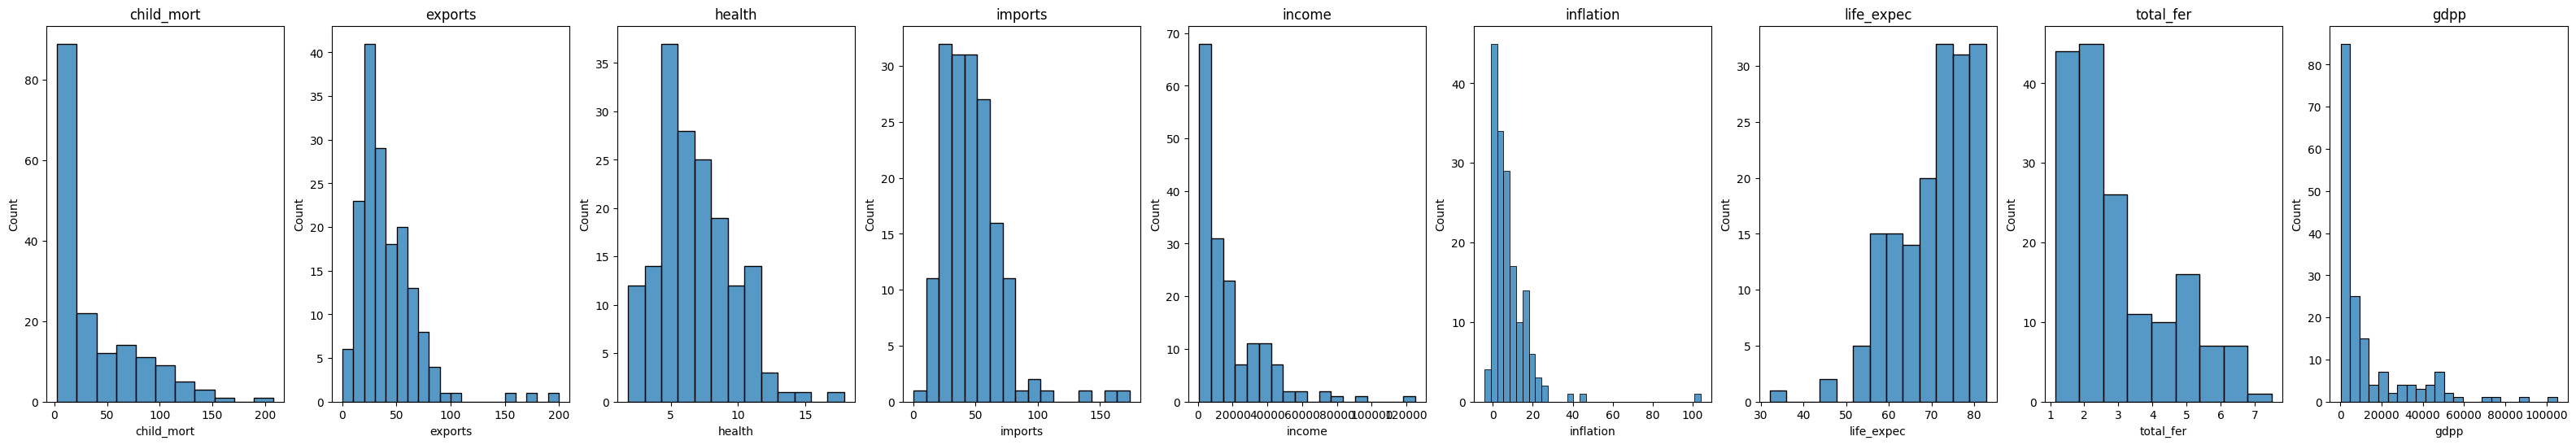

In [3]:
df_only_numeric = df.select_dtypes(np.number)

# Create the subplots
n_rows, n_cols = df_only_numeric.shape
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(40, 6))
for i, column in enumerate(df_only_numeric):
    sns.histplot(data=df_only_numeric, x=column, ax=axes[i]).set_title(column)

# 🔎 Is it wise to scale the data?
* 🔎 Why do we want to preprocess the data?
* What different options do we have?

# Data preprocessing

In [4]:
X = df_only_numeric.values

In [5]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_min_max_scaled = scaler.fit_transform(X)
X_min_max_scaled

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [6]:
df.select_dtypes(np.number).columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
df_scaled = pd.DataFrame(X_min_max_scaled, columns=df_only_numeric.columns)

In [8]:
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


# ✅ Task (2p)
## Use k-means or agglomerative clustering algorithm to cluster the data
- 🔎 How many clusters did you choose? Why?

## Perform an exploration analysis of the clustered data
- 💡Write down your conlusions about differences/similarities about the feature characteristics according to the individial clusters

## 🎯 Write down a conlustion about clusters as a whole, i.e. try to characterize the data in them in a few sentences
- Cluster 1 - ...
- Cluster 2 - ...
- ...
- Cluster N - ...

* **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
  * ❌ Plot interpretation figured in real-time during task check is not allowed! ❌

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

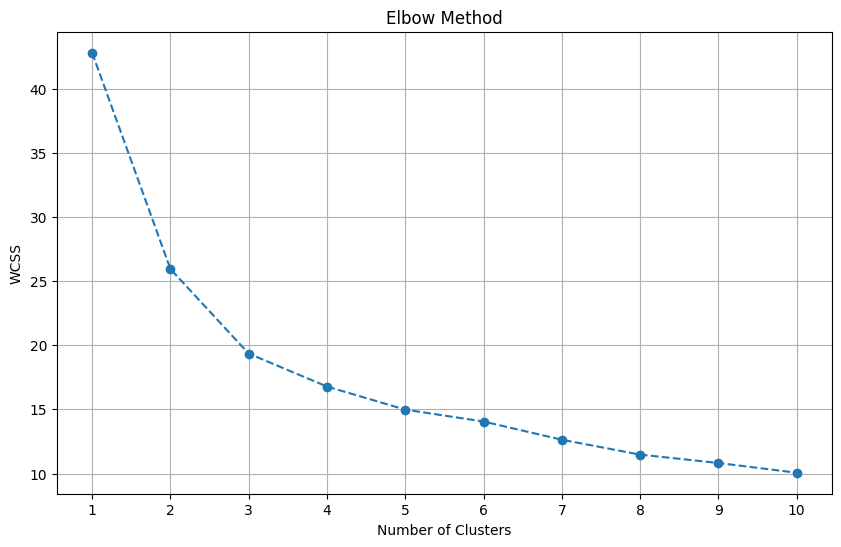

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_scaled)

df['clusterA'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-20-c24f92a5bbde>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('clusterA').mean()


          child_mort    exports    health    imports        income  inflation  \
clusterA                                                                        
0          22.425581  40.382430  6.215581  46.932162  12770.813953   7.609023   
1          93.284783  29.287174  6.338478  43.297826   3516.804348  12.097065   
2           4.897143  58.431429  8.917429  51.508571  45802.857143   2.535000   

          life_expec  total_fer          gdpp   cluster  
clusterA                                                 
0          72.582558   2.293256   6719.790698  1.883721  
1          59.393478   5.090217   1695.913043  1.152174  
2          80.245714   1.741143  43117.142857  0.285714  


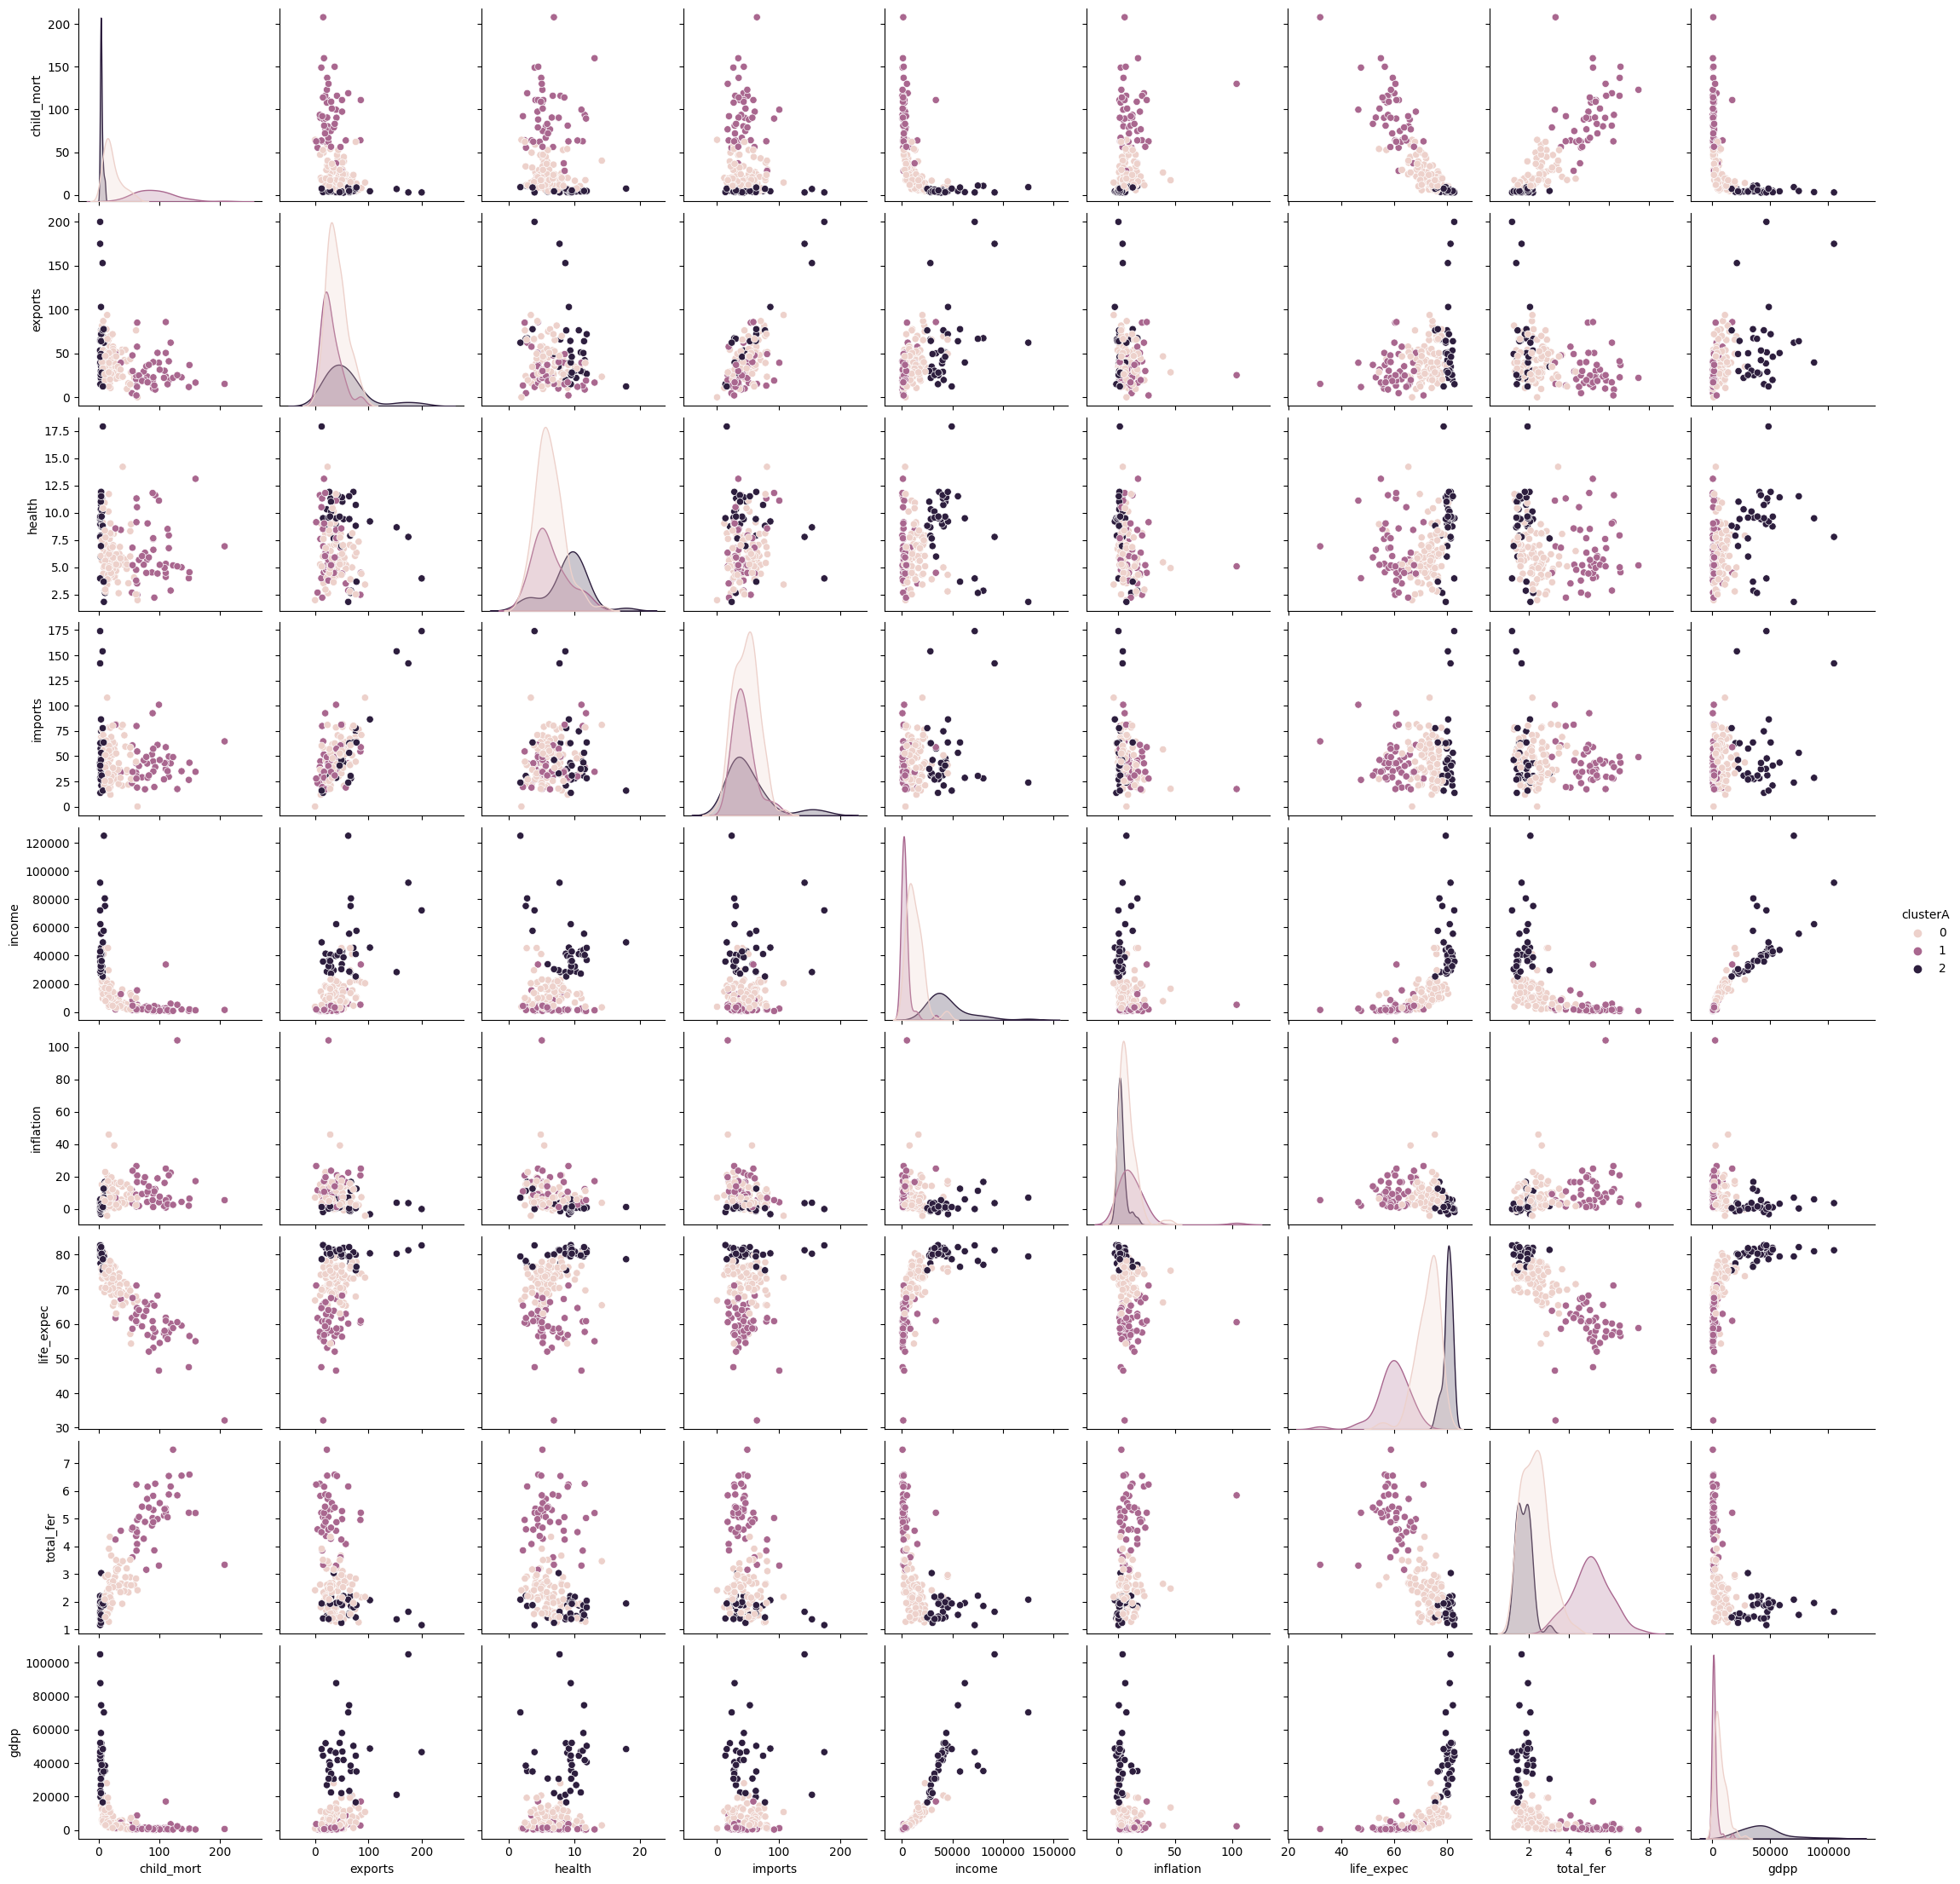

In [ ]:
cluster_means = df.groupby('clusterA').mean()
print(cluster_means)

sns.pairplot(df, hue='clusterA', vars=df_only_numeric.columns)
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)
clusters = agglo.fit_predict(df_scaled)

df['cluster'] = clusters


<ipython-input-18-0b53a941321e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('cluster').mean()


         child_mort    exports    health    imports        income  inflation  \
cluster                                                                        
0          5.961765  58.508824  8.501176  48.902941  47588.235294   4.115500   
1         97.102439  29.349244  5.551220  37.969900   3569.097561  12.807195   
2         23.991304  39.919348  6.756304  50.121739  11943.804348   6.897217   

         life_expec  total_fer          gdpp  clusterA  
cluster                                                 
0         79.982353   1.888529  43170.588235  1.882353  
1         59.675610   5.129756   1680.731707  0.048780  
2         71.920652   2.367174   6829.391304  0.967391  


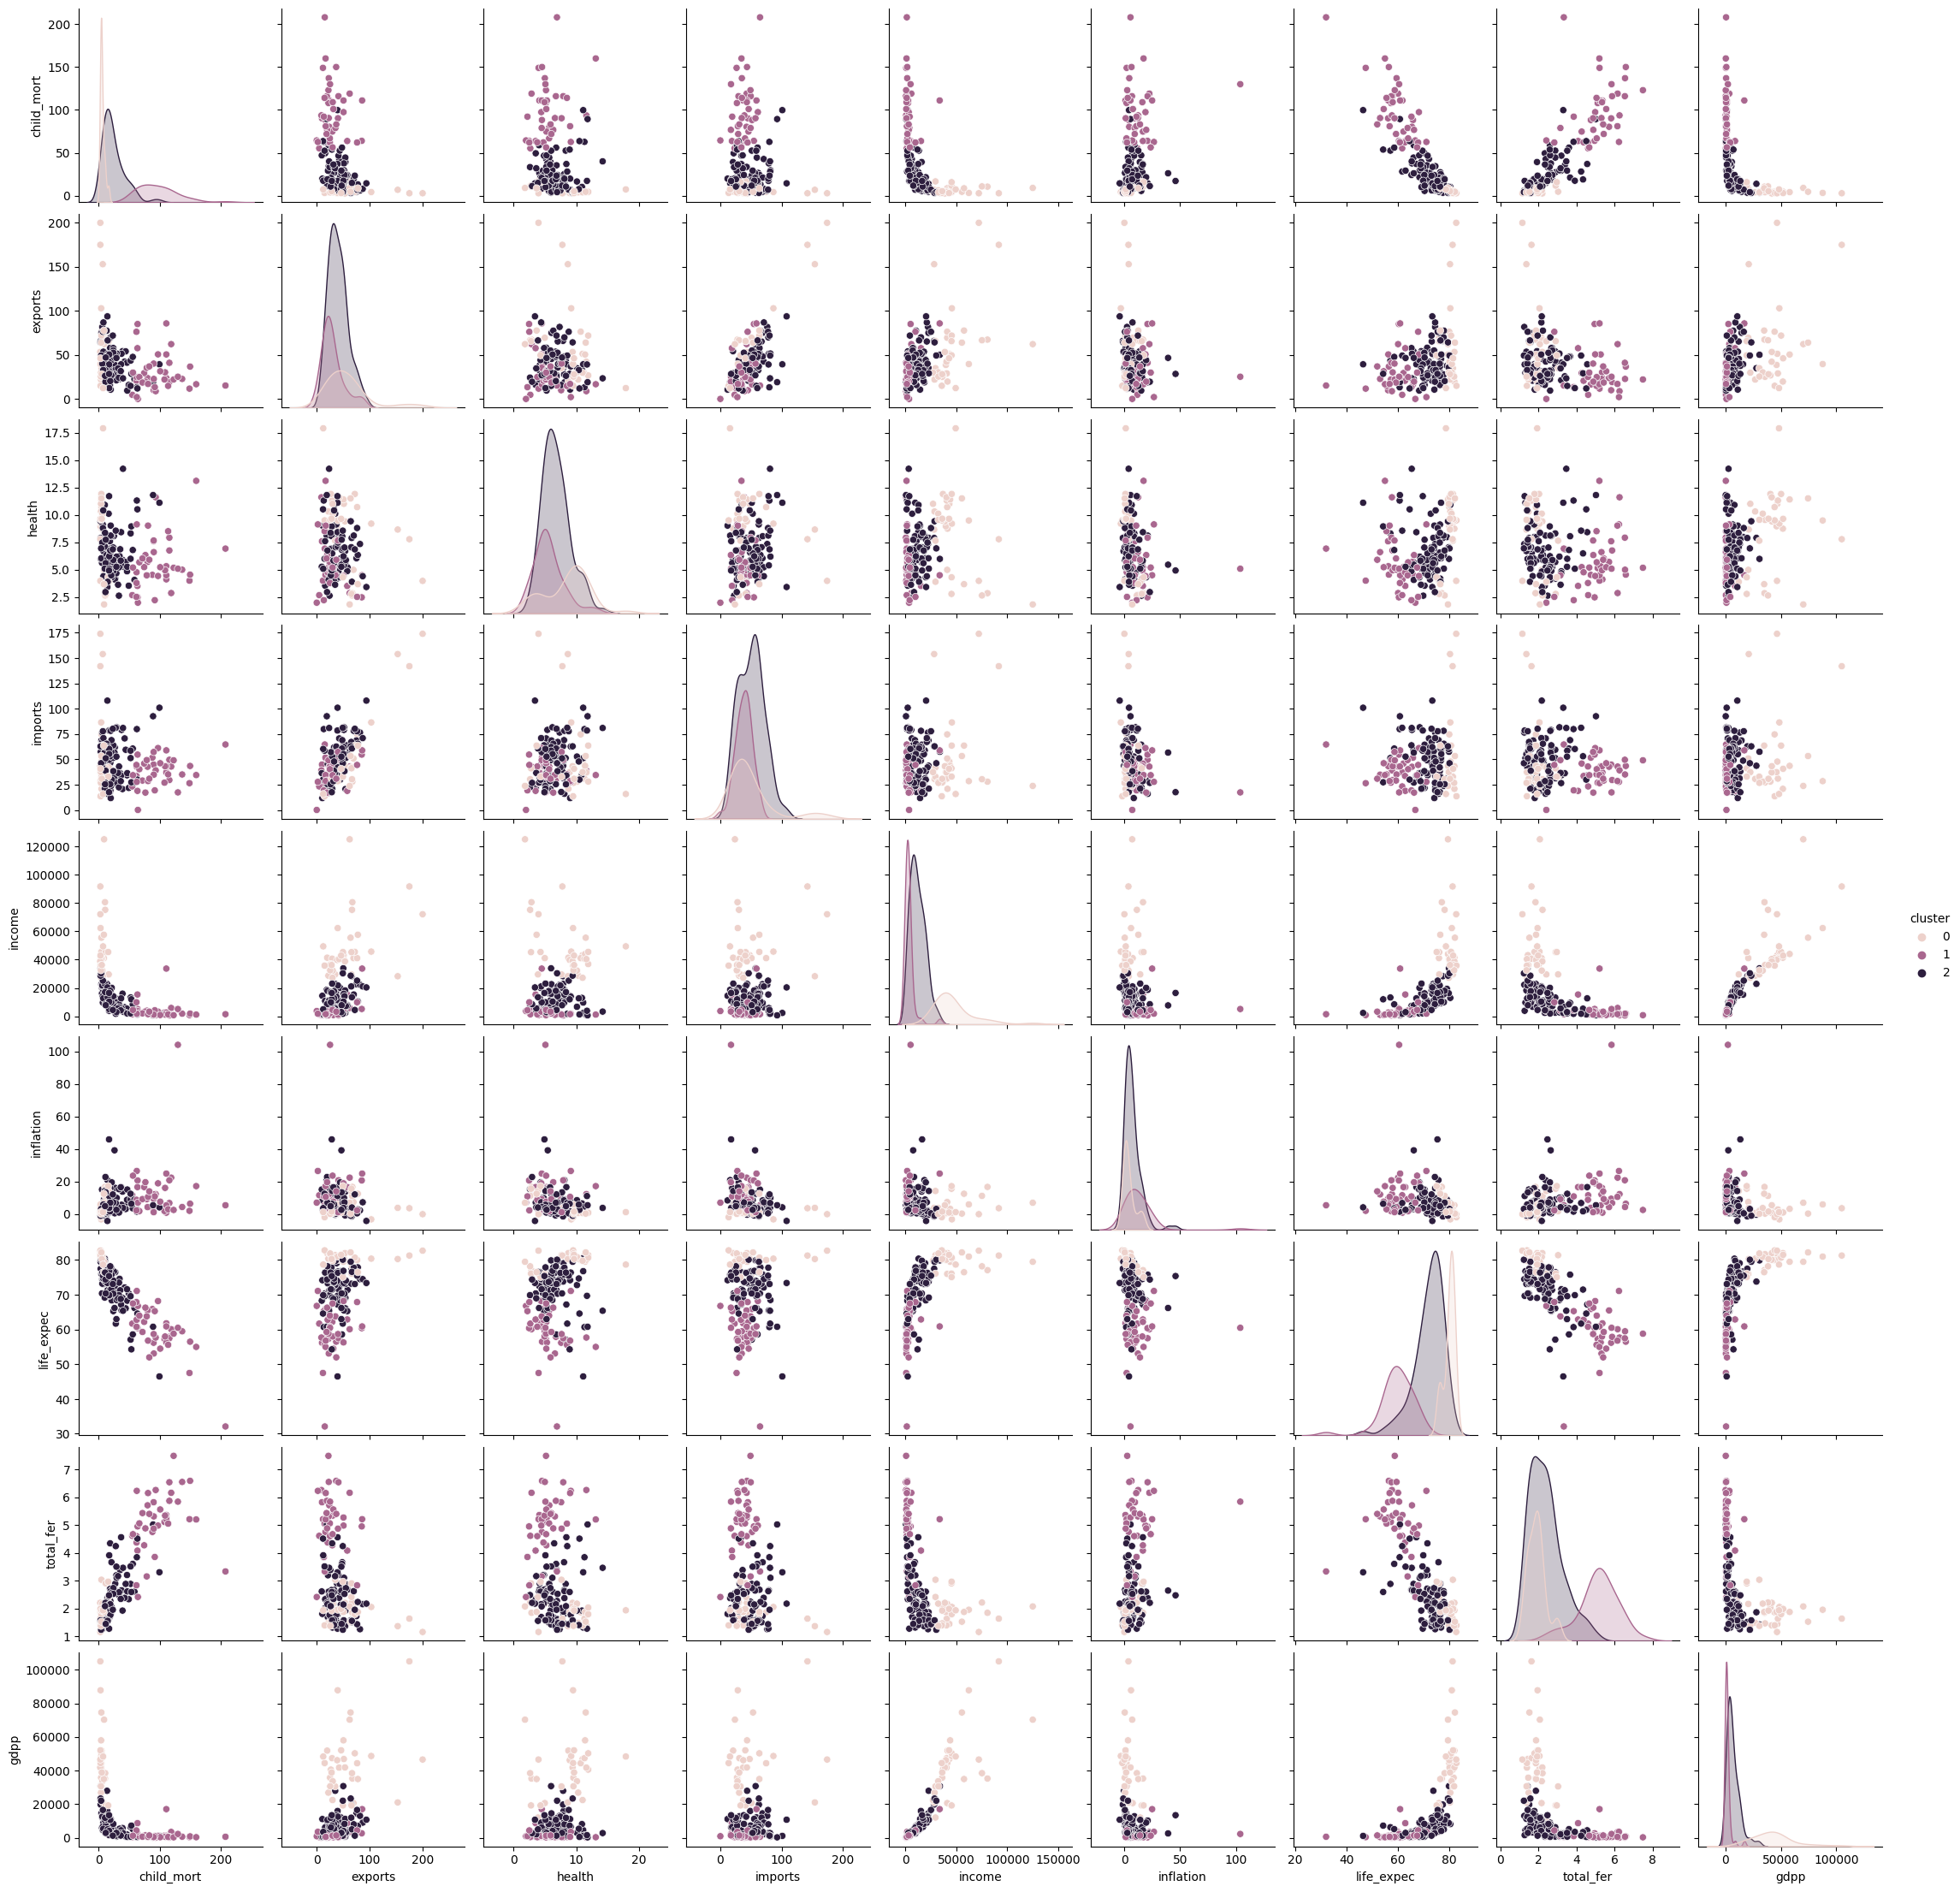

In [ ]:

cluster_means = df.groupby('cluster').mean()
print(cluster_means)

sns.pairplot(df, hue='cluster', vars=df_only_numeric.columns)
plt.show()


In [ ]:
v clusteru 1 je nejvyšší smrtelnost dětí

# 🚀 Let's get started!

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_06_meme_02.jpg?raw=true)